## Numpy

In [3]:
import numpy as np
import timeit

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [3]:
import random
import timeit



def withNumpy():
    arr = np.random.randint(1,101,size = 100_000)
    arr += 1
def withList():
    list1 = [random.randint(1,100) for i in range(100_000)]
    for i in range(100_000): 
        list1[i] += 1

%timeit withNumpy()
%timeit withList()


1.79 ms ± 60.8 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)
112 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [4]:
from math import sin, cos
from random import  uniform
def mathList(): 
    res = []
    nums = [uniform(0,2 * np.pi) for i in range(10000)]
    for n in nums: 
        res.append(sin(n) + cos(n))
def mathNp():
    random_numbers = np.random.uniform(0, 2 * np.pi, size=10000)  
    sin_values = np.sin(random_numbers)
    cos_values = np.cos(random_numbers)
    sum_values = sin_values + cos_values



%timeit mathList()
%timeit mathNp()

10.7 ms ± 381 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
691 μs ± 22.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [8]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result


def cubSumNp(x): 
    arr = np.array(x)
    arr **= 3
    return np.sum(arr)

l = [random.uniform(0,5) for i in range(1000)]
%timeit cube_sum(l)
%timeit cubSumNp(l)
def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m= sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result

def almostVarianceNp(x): 
    arr = np.array(x, dtype = float)
    m = np.sum(arr) / len(arr)
    arr -= m
    arr **= 4
    res = np.sum(arr) / len(arr)
    return res 
%timeit almost_variance([random.randint(1,101) for _ in range(100_000)])
%timeit almostVarianceNp([random.randint(1,101) for _ in range(100_000)])
    

356 μs ± 9.95 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
178 μs ± 4.9 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
154 ms ± 3.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
118 ms ± 3.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [11]:
def multTable(): 
    return np.arange(1, 11).reshape(10, 1) * np.arange(1, 11)
print(multTable())

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [ ]:

from scipy.spatial.distance import cdist

def distance(x): 
    matrix = x.reshape(10,5)
    diff = matrix[:, np.newaxis, :] - matrix[np.newaxis, :, :]
    squers = np.sum(diff**2, axis=-1)
    distMatrix = np.sqrt(squers)
    print(distMatrix)

def distance2(x): 
    matrix = x.reshape(10,5)
    distMatrix = cdist(matrix, matrix)
    print(distMatrix)

arr = np.random.randint(1,101,size = 50)
distance(arr)
print('=======================================')
distance2(arr)

    

[[[27 49 55 49 45]]

 [[46 94 70 47 93]]

 [[39 27 82 82 40]]

 [[33 69 26 47 87]]

 [[32  5 81 79 86]]

 [[86 38 42 84 99]]

 [[15 41 16 28 83]]

 [[55 78 91 68 11]]

 [[ 2 26 15  8 83]]

 [[11 11  3 34  4]]]
[[  0.          70.13558298  49.70915409  55.18151865  72.23572523
   88.94942383  60.11655346  66.6183158   76.67463727  79.43550843]
 [ 70.13558298   0.          93.35952014  52.59277517  96.4935231
   83.21658489  84.53993139  89.12350981 105.85839598 143.85061696]
 [ 49.70915409  93.35952014   0.          91.48770409  51.56549234
   86.11039426  99.46356117  63.04760106 114.82160076 104.3120319 ]
 [ 55.18151865  52.59277517  91.48770409   0.          90.26073343
   74.42445835  39.81205847 104.9142507   66.84309987 106.93455943]
 [ 72.23572523  96.4935231   51.56549234  90.26073343   0.
   75.6306816   91.76055798 108.18502669 103.66773847 123.73358477]
 [ 88.94942383  83.21658489  86.11039426  74.42445835  75.6306816
    0.          95.48821917 113.85077953 118.15667565 139.

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [4]:
def white(matrix): 
    colMean = np.mean(matrix, axis=0)
    colStd = np.std(matrix, axis=0)
    return (matrix - colMean) / colStd

print(white(np.arange(0,10).reshape(5, 2)))


[[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]


### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [13]:
def closest(x, A): 
    tmpArr = A.copy()
    tmpArr -= x
    tmpArr = np.abs(tmpArr)
    minDiffIdx = np.argmin(tmpArr)
    coord = np.unravel_index(minDiffIdx, tmpArr.shape)
    return A[coord]
print(closest(1.5, np.array([1,-4,3,23,12,4,354,5,-100], dtype=float).reshape(3,3)))

1.0


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [25]:
def myPoly1d(x, A):
    tmpArr = np.full(len(A), x, dtype=float)
    tmpArr[0] = 1
    nextPowers = np.cumprod(tmpArr)
    nextPowers = nextPowers[::-1]
    res = A * nextPowers
    print(np.sum(res))
myPoly1d(2,[2,3,1])



15.0


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [29]:
# !pip install matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

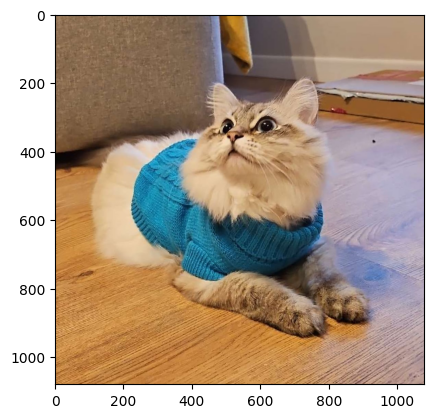

In [44]:
img = mpimg.imread('images/cat.jpg')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

(np.float64(-0.5), np.float64(1079.5), np.float64(1079.5), np.float64(-0.5))

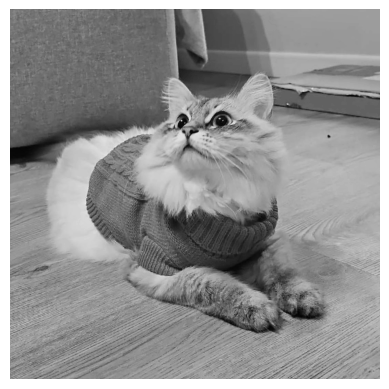

In [43]:
img = mpimg.imread('images/cat.jpg')
plt.imshow(img)
catImg = np.array(img)
R = catImg[:, :, 0]
G = catImg[:, :, 1]
B = catImg[:, :, 2]
shadows = 0.2126 * R + 0.7152 * G + 0.0722 * B
plt.imshow(shadows, cmap='gray')
plt.axis('off')


### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$